### Код с урока

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

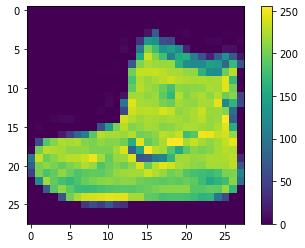

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

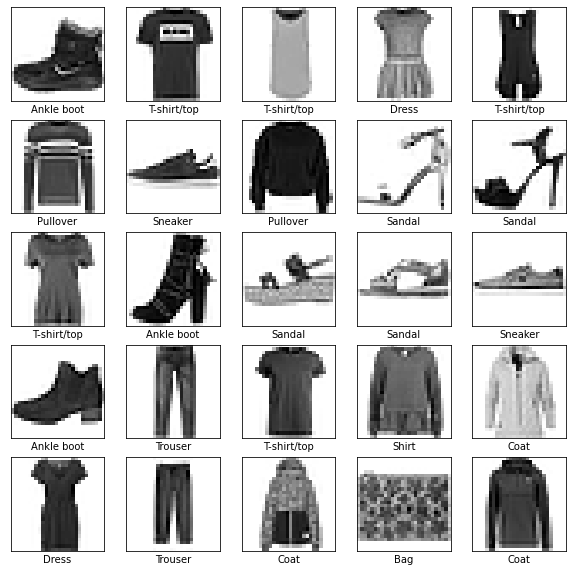

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
# Построение модели
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# Тренировка
model.fit(train_images, train_labels, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 2s 37us/sample - loss: 0.5000 - accuracy: 0.8248
Epoch 2/3
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3769 - accuracy: 0.8644
Epoch 3/3
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3367 - accuracy: 0.8768


In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3756 - accuracy: 0.8687

Test accuracy: 0.8687


## Анализ

In [24]:
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import time

In [261]:
def create_nn(train_images, train_labels, neurons_in_layer=[128], activation='relu', optimizer='adam', n_epochs=10):
    
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28))])
    
    if len(neurons_in_layer) > 1:
        for i in range(1, len(neurons_in_layer)):
            model.add(keras.layers.Dense(neurons_in_layer[i], activation=activation))
    model.add(keras.layers.Dense(10))
    
    model.compile(optimizer=optimizer, 
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                  metrics=['accuracy'])
    
    model.fit(train_images, train_labels, epochs=n_epochs, verbose=0)
    
    return model

In [262]:
def evaluate_and_plot_results(test_images, test_labels, train_images, train_labels, params_list):
    for element in params_list:
        grid = ParameterGrid(element)
        accuracy_list = []
        time_list = []
        for param in grid:
            start = time.time()
            model = create_nn(train_images, train_labels, **param)
            end = time.time()
            accuracy = model.evaluate(test_images, test_labels, verbose=0)[1]
            accuracy_list.append(accuracy)
            time_list.append(end - start)
        
        to_print_acc = [float('{:.3f}'.format(x)) for x in accuracy_list]
        to_print_time = [float('{:.3f}'.format(x)) for x in time_list]
        fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 10))
        ax1.barh([str(ele) for ele in list(element.values())[0]], accuracy_list, color='cornflowerblue')
        ax2.barh([str(ele) for ele in list(element.values())[0]], time_list, color='cornflowerblue')
        ax1.set_xlim([0.75, 0.95])
        
        for i, v in enumerate(accuracy_list):
            if v == max(accuracy_list):
                ax1.text(v-(v-0.75)/2, 
                         i-len(accuracy_list)/80, 
                         to_print_acc[i], 
                         color='green', 
                         fontweight='bold', 
                         fontsize=18)
            elif v == min(accuracy_list):
                ax1.text(v-(v-0.75)/2, 
                         i-len(accuracy_list)/80, 
                         to_print_acc[i], 
                         color='red', 
                         fontweight='bold', 
                         fontsize=18)
            else:
                ax1.text(v-(v-0.75)/2, 
                         i-len(accuracy_list)/80, 
                         to_print_acc[i], 
                         color='black', 
                         fontweight='bold', 
                         fontsize=18)
        for i, v in enumerate(time_list):
            if v == max(time_list):
                ax2.text(v/2, i-len(time_list)/80, to_print_time[i], color='red', fontweight='bold', fontsize=18)
            elif v == min(time_list):
                ax2.text(v/2, i-len(time_list)/80, to_print_time[i], color='green', fontweight='bold', fontsize=18)
            else:
                ax2.text(v/2, i-len(time_list)/80, to_print_time[i], color='black', fontweight='bold', fontsize=18)

        ax1.set_xlabel('Точность')
        ax2.set_xlabel('Время обучения')
        ax1.grid(True)
        ax2.grid(True)
        plt.show()
        print('_' * 100)

In [263]:
param_list = [{'neurons_in_layer': [[10], [128], [784], 
                                    [10, 10], [128, 128], [128, 64], [128, 42],
                                    [10, 10, 10], [128, 128, 128], [128, 64, 32], [128, 42, 15]]},
              {'activation': ['relu', 'sigmoid', 'elu', 'linear']},
              {'optimizer': ['adam', 'sgd', 'adamax', 'nadam']},
              {'n_epochs': [1, 2, 3, 5, 7, 10, 20]}]

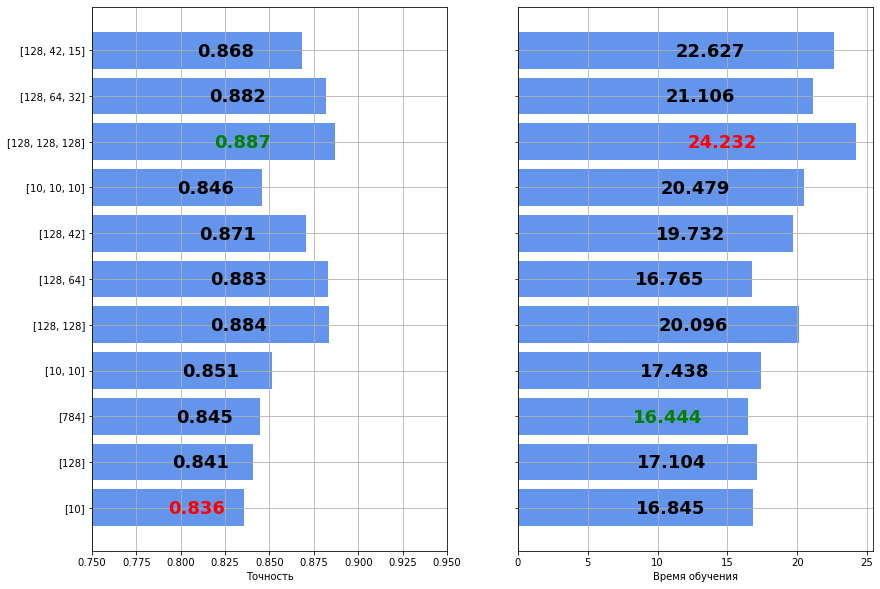

____________________________________________________________________________________________________


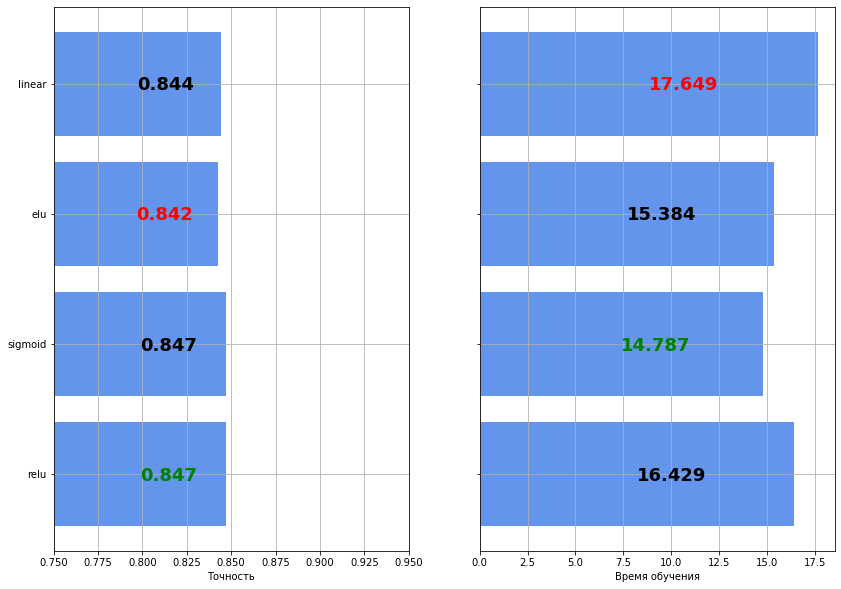

____________________________________________________________________________________________________


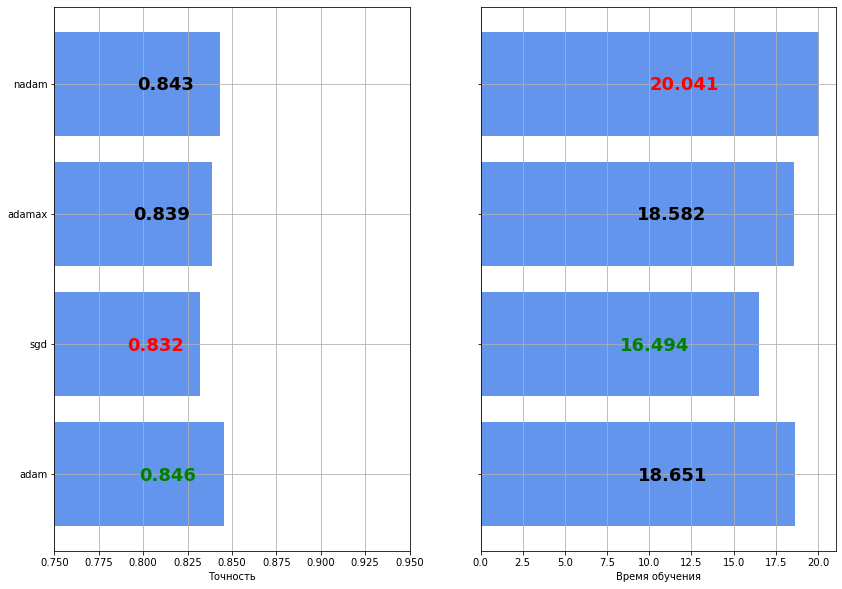

____________________________________________________________________________________________________


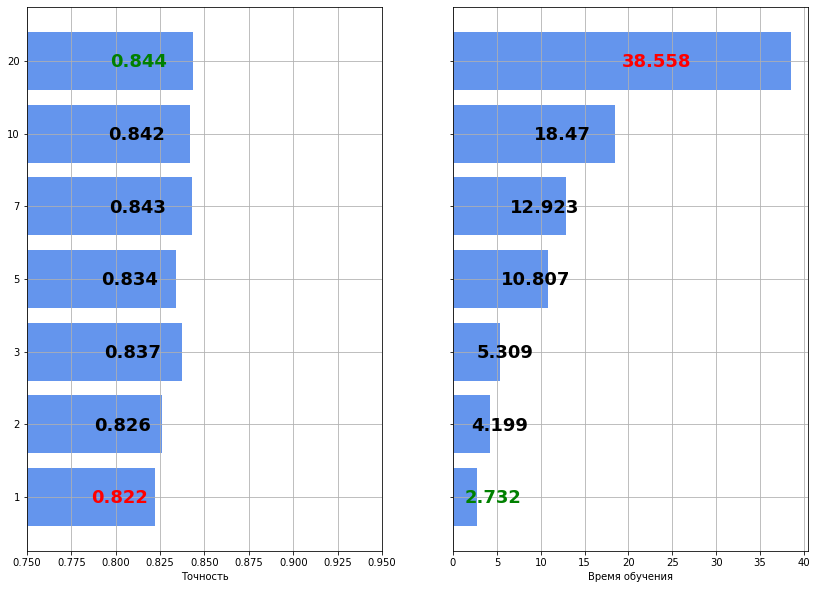

____________________________________________________________________________________________________


In [264]:
evaluate_and_plot_results(test_images, test_labels, train_images, train_labels, param_list)

### Выводы

Выводы, сопоставимы с теми, что были сделаны при анализе предыдущего урока (MNIST, определение рукописных цифр):
* больше слоев и нейронов в них дают большую точность предсказания, но так же и большее время обучения
* adam и relu дают лучшие показатели точности для данного набора данных, при этом они не являются самыми сложными для вычислений
* больше эпох - выше точность и больше времени обучения
* по каким-то причинам, казалась бы самая простая линейная функция активации дает в этой задачи максимальное время обучения  
  
Небольшой топ конфигураций нейронов:
1. 3 слоя по 128 нейронов
2. 2 слоя по 128 нейронов
3. 2 слоя 128 и 64 нейрона (в новом слое в 2 раза меньше нейронов)
4. 3 слоя 128, 64 и 32 нейрона (в каждом слое в 2 раза меньше нейронов)
5. 2 слоя 128 и 42 нейрона (в новом слое в 3 раза меньше нейронов)

## IMdB dataset

Двигался по этому туториалу  
https://www.tensorflow.org/tutorials/keras/text_classification  
  
Также добавлял свои комментарии для понимания

#### Загрузка данных

In [268]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

Датасет содержит 50.000 рецензий на фильмы. Они разделены по 25.000 на тестовую и тренировочную выборку. Датасеты сбалансированы (содержат одинаковое количество положительных и отрицательных отзывов)

Датасет уже предобработан и вместо массивов текста содержит массивы целых чисел, где каждое число соответствует определенному слову в словаре. Также к датасету прилагается энкодер, кодорый позволяет переводить числа в слова и наоборот.

In [269]:
(train_data, test_data), info = tfds.load(
    # Use the version pre-encoded with an ~8k vocabulary.
    'imdb_reviews/subwords8k', 
    # Return the train/test datasets as a tuple.
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    # Return (example, label) pairs from the dataset (instead of a dictionary).
    as_supervised=True,
    # Also return the `info` structure. 
    with_info=True)

Shuffling and writing examples to /Users/ian/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete8T31G5/imdb_reviews-train.tfrecord
Shuffling and writing examples to /Users/ian/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete8T31G5/imdb_reviews-test.tfrecord
Shuffling and writing examples to /Users/ian/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete8T31G5/imdb_reviews-unsupervised.tfrecord
Dataset imdb_reviews downloaded and prepared to /Users/ian/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


#### Пример использования энкодера

In [270]:
encoder = info.features['text'].encoder
print ('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [271]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print ('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print ('The original string: "{}"'.format(original_string))

assert original_string == sample_string

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [272]:
for ts in encoded_string:
  print ('{} ----> {}'.format(ts, encoder.decode([ts])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


Видно, что энкодер составляет слова из меньших по объему слов, поэтому строка из 2 слов трансформируется в набор из 7 чисел.

#### Обзор данных

Рецензии, так же как и пример выше, содержат наборы чисел, где каждое число обозначает часть слова. Таргет переменная бинарна, где 0 - это отрицательный отзыв, а 1 - положительный.  
Посмотрим на одну из рецензий:

In [273]:
# Как текст выглядит в датасете
for train_example, train_label in train_data.take(1):
  print('Encoded text:', train_example[:10].numpy())
  print('Label:', train_label.numpy())

Encoded text: [  62   18   41  604  927   65    3  644 7968   21]
Label: 0


In [274]:
# Восстановим оригинальный текст
encoder.decode(train_example)

"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

#### Подготовка тренировочных данных

Так как все рецензии имеют различную длину а на вход нейросети надо подавать данные одного размера, необходимо разделить рецензии на равные батчи с использованием команды **padded_batch**. Помимо разделения на равные батчи, команда заполняет 0 (или пользовательским значением) короткие массивы до необходимой длины.  
Спрака: https://www.tensorflow.org/api_docs/python/tf/data/Dataset  
source: https://github.com/tensorflow/tensorflow/blob/v2.1.0/tensorflow/python/data/ops/dataset_ops.py#L1383-L1481

In [277]:
BUFFER_SIZE = 1000

train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32, padded_shapes=([None],[])))

test_batches = (
    test_data
    .padded_batch(32, padded_shapes=([None],[])))

In [279]:
# Посмотрим на получившиеся размеры первых двух батчей
for example_batch, label_batch in train_batches.take(2):
    print("Batch shape:", example_batch.shape)
    print("label shape:", label_batch.shape)

Batch shape: (32, 1021)
label shape: (32,)
Batch shape: (32, 904)
label shape: (32,)


#### Построение модели

In [280]:
model = keras.Sequential([
  keras.layers.Embedding(encoder.vocab_size, 16),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(1)])

model.summary()

Model: "sequential_571"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_838 (Dense)            (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


Описанная выше модель состоит из:  
1. Слой embedding, который в самом простом случае ставит в соответствие каждому слову массив чисел (плотность). На начальном этапе этот массив имеет случайные веса, как и вся модель в целом, но в ходе обучения, веса подгоняются таким образом, чтобы близкие по смыслу слова для исследуемой темы имели близкие вектора. В нашем случае на вход подаются не отдельные слова а массивы слов (часть из целой рецензии), которым также в соответствие ставится вектор из 16 чисел. Выходной массив будет иметь на одну размерность больше, чем входной, добавляя к каждому массиву слов, массив его плотностей. Таким образом, в нашем случае, массив (32, 1021) трансформируется в (32, 1021, 16). (справка: https://www.tensorflow.org/tutorials/text/word_embeddings)
2. Следующий слой GlobalAveragePooling1D трансформирует массив из входного слоя (которые сейчас имеют различную длину) в массив фиксированной длины
3. Этот массив проходит через полносвязный слой с 16 скрытыми нейронами
4. Последний полносвязный слой с одним выходным нейроном и функцией активации sigmoid показывает вероятность от 0 до 1, является ли отзыв положительным или отрицательным.

In [281]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Обучение модели

In [282]:
history = model.fit(train_batches,
                    epochs=10,
                    validation_data=test_batches,
                    validation_steps=30)

Epoch 1/10
782/782 [==============================] - 4s 6ms/step - loss: 0.6821 - accuracy: 0.5008 - val_loss: 0.6655 - val_accuracy: 0.5073
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.6207 - accuracy: 0.5546 - val_loss: 0.5945 - val_accuracy: 0.5990
Epoch 3/10
782/782 [==============================] - 3s 3ms/step - loss: 0.5393 - accuracy: 0.6678 - val_loss: 0.5326 - val_accuracy: 0.7281
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 0.4739 - accuracy: 0.7506 - val_loss: 0.4825 - val_accuracy: 0.7969
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.4217 - accuracy: 0.8025 - val_loss: 0.4452 - val_accuracy: 0.7844
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 0.3809 - accuracy: 0.8336 - val_loss: 0.4164 - val_accuracy: 0.8396
Epoch 7/10
782/782 [==============================] - 3s 3ms/step - loss: 0.3487 - accuracy: 0.8531 - val_loss: 0.3968 - val_accuracy: 0.8458
Epoch 

#### Оценка модели

In [284]:
loss, accuracy = model.evaluate(test_batches)
print()
print("Loss: ", loss)
print("Accuracy: ", accuracy)

    782/Unknown - 3s 4ms/step - loss: 0.3320 - accuracy: 0.8636
Loss:  0.3319916467532477
Accuracy:  0.86364


#### Графики

In [285]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

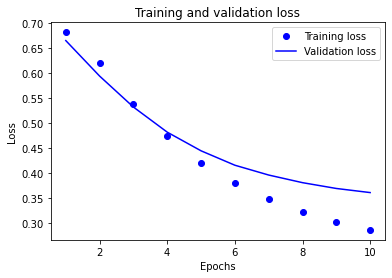

In [286]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

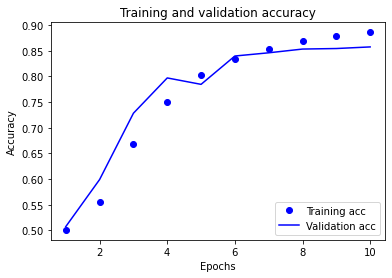

In [287]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

В модели видно небольшое переобучение, так как она ведет себя несколько хуже на данных, которые она никогда не видела, нежели на тренировочных. 